# データサイエンス応用 #3

## 形態素解析プログラムMeCabのインストール
本題の前に少し準備をしたいと思います。

自然言語処理において形態素解析は重要な技術です。 
前回は、形態素解析器にPythonのみで実装されているJanomeを利用しました。
しかし、どうしても処理速度が遅く、結果の出力に多くの時間を要することがありました。
そこで、今回はあらためてMeCabをインストールしたいと思います。

### 64bit版MeCabのインストール
MeCabをWindowsの環境でインストールして、Pythonで利用するのは、ソースをダウンロードしてコンパイルしたりと、面倒な作業が必要でした。 

MeCabの公式サイト（ https://taku910.github.io/mecab/ ）では、Windows版のコンパイル済バイナリも配布されていますが、
64bit版Pythonでは、公式サイトで配布されているWindows用32bit版MeCabバイナリが実行できません。
また、この資料を執筆している時点でMeCabの公式サイトでは開発が止まっています。

そこで、https://qiita.com/yukinoi/items/5dfc674c040f6d81a8a1 で公開されている@yukinoiさん作成のWindows用64bit版MeCabバイナリを利用したいと思います。
このドキュメントにも説明があるように、https://github.com/ikegami-yukino/mecab/releases からWindows用64bit版MeCabバイナリのインストーラ（拡張子に.exeが付いてるファイル）の最新版をダウンロードしてください。

インストーラのファイルをダウンロードできたら、クリックして実行してください。
インストールがはじまったら、基本的には、表示される指示に従いクリックをして進めれば完了します。
ただし、「辞書の文字コードの選択」は、必ず`UTF-8`にしてください。
インストールが完了すると`C:\Program Files\MeCab`にファイル一式が置かれます。
MeCabのコマンドは`C:\Program Files\MeCab\bin\mecab.exe`になります。

なお、以前、このMeCabを`UTF-8`以外の設定でインストールしたことがある人は、一度、MeCabをアンインストールして入れなおす必要があります。
万が一、アンインストールした後も`C:\Program Files\MeCab`のフォルダが残っているときは、手動で完全に削除するようにしてください。

Windowsのコマンドプロンプトから`C:\Program Files\MeCab\bin\mecab.exe`を実行するとMeCabを動かすことができますが、
Windowsのコマンドプロンプトでは、そのままでは文字化けをしてしまいます（文字コードの設定の問題です）。
今回は、MeCabを単体で利用することはやめて、Pythonからモジュールを使って呼び出すことにしましょう。

なお、お使いのWindowsが32bit版の場合（ほとんどの人は該当しないと思います）は、MeCabの公式サイトから32bit版をダウンロードして利用してください。
他のOSをご利用の場合も、MeCabのインストールを解説したサイトは多くありますので、ウェブ検索をするようにしてください。

### mecabモジュールのインストール
次に、おなじく@yukinoiさん作成のmecabモジュールをインストールします。
このモジュールは、PythonからMeCabを呼び出すラッパーとなっています。
詳細は、https://qiita.com/yukinoi/items/990b6933d9f21ba0fb43 をご確認ください。
このモジュールは、MeCabが正しくインストールされていれば、64bit, 32bit両方のWindows及びmacOS, Linuxなどでも共通して使用することができます。

インストールには`pip`コマンドを使用します。`Successfully installed mecab-0.996.3`のように表示されればOKです。

---

!pip install mecab

---

このコマンドでは、MeCabを利用するためのモジュールをインストールするのみです。
MeCabのプログラム本体は、上記のように、あらかじめインストールする必要があることに注意してください。

In [17]:
!pip install mecab

次にMeCabを使ってみます。

`t = MeCab.Tagger() `でインスタンスを生成し、`t.parse(input_txt)`とすることで、入力テキストの形態素解析結果を取得することができます。
ここで、MeCabの出力結果`parse`は、一つの文字列になっていますので、改行`\n`で`split()`して、各形態素（単語）をリスト`lines`に格納しています。

---
    import MeCab

    t = MeCab.Tagger()

    input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"
    #input_txt = "すもももももももものうち"

    parse = t.parse(input_txt)
    lines = parse.split('\n')

    for token in lines:
        print(token)
---

In [18]:
import MeCab

t = MeCab.Tagger()

input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"
#input_txt = "すもももももももものうち"

parse = t.parse(input_txt)
lines = parse.split('\n')

for token in lines:
    print(token)

主人公	名詞,一般,*,*,*,*,主人公,シュジンコウ,シュジンコー
「	記号,括弧開,*,*,*,*,「,「,「
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
」	記号,括弧閉,*,*,*,*,」,」,」
の	助詞,連体化,*,*,*,*,の,ノ,ノ
モデル	名詞,一般,*,*,*,*,モデル,モデル,モデル
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
夏目	名詞,固有名詞,人名,姓,*,*,夏目,ナツメ,ナツメ
漱石	名詞,固有名詞,人名,名,*,*,漱石,ソウセキ,ソーセキ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
家	名詞,一般,*,*,*,*,家,イエ,イエ
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
迷い込ん	動詞,自立,*,*,五段・マ行,連用タ接続,迷い込む,マヨイコン,マヨイコン
で	助詞,接続助詞,*,*,*,*,で,デ,デ
住み着い	動詞,自立,*,*,五段・カ行イ音便,連用タ接続,住み着く,スミツイ,スミツイ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
野良	名詞,一般,*,*,*,*,野良,ノラ,ノラ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
黒	名詞,一般,*,*,*,*,黒,クロ,クロ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
が	助詞,格助詞,一般,*,*,*,が,ガ,ガ
死亡	名詞,サ変接続,*,*,*,*,死亡,シボウ,シボー
し	動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た	助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
際	名詞,非自立,副詞可能,*,*,*,際,サイ,サイ
、	記号,読点,*,*,*,*,、,、,、
漱石	名詞,固有名詞,人名,名,*,*,漱石,ソウセキ,ソーセキ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
親しい	形容詞,自立,*,*,形容詞・イ段,基本形,親しい,シタシイ,シタシイ
人達	名詞,一般,*,*,*,*,人達,ヒトタチ,ヒトタチ
に	助詞,格助詞,一般,*,*,*,に,ニ,

次のように、`parseToNode()`で、最初のノードを取得することができます。
n.nextをすることによって次のノードに移ることができます。
ノードには、surface（表層形）、feature（品詞を含む詳細な情報）の解析結果が入ります。
`n.surface`と`n.feature`でそれぞれの中身を参照することができます。

---
    import MeCab

    t = MeCab.Tagger()

    input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"
    #input_txt = "すもももももももものうち"

    n = t.parseToNode(input_txt)

    while n:
        print(n.surface, "\t", n.feature)
        n = n.next
---

In [19]:
import MeCab

t = MeCab.Tagger()

input_txt = "主人公「吾輩」のモデルは、夏目漱石に家に迷い込んで住み着いた野良の黒猫である。猫が死亡した際、漱石は親しい人達に猫の死亡通知を出した。"
#input_txt = "すもももももももものうち"

n = t.parseToNode(input_txt)

while n:
    print(n.surface, "\t", n.feature)
    n = n.next

 	 BOS/EOS,*,*,*,*,*,*,*,*
主人公 	 名詞,一般,*,*,*,*,主人公,シュジンコウ,シュジンコー
「 	 記号,括弧開,*,*,*,*,「,「,「
吾輩 	 名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
」 	 記号,括弧閉,*,*,*,*,」,」,」
の 	 助詞,連体化,*,*,*,*,の,ノ,ノ
モデル 	 名詞,一般,*,*,*,*,モデル,モデル,モデル
は 	 助詞,係助詞,*,*,*,*,は,ハ,ワ
、 	 記号,読点,*,*,*,*,、,、,、
夏目 	 名詞,固有名詞,人名,姓,*,*,夏目,ナツメ,ナツメ
漱石 	 名詞,固有名詞,人名,名,*,*,漱石,ソウセキ,ソーセキ
に 	 助詞,格助詞,一般,*,*,*,に,ニ,ニ
家 	 名詞,一般,*,*,*,*,家,イエ,イエ
に 	 助詞,格助詞,一般,*,*,*,に,ニ,ニ
迷い込ん 	 動詞,自立,*,*,五段・マ行,連用タ接続,迷い込む,マヨイコン,マヨイコン
で 	 助詞,接続助詞,*,*,*,*,で,デ,デ
住み着い 	 動詞,自立,*,*,五段・カ行イ音便,連用タ接続,住み着く,スミツイ,スミツイ
た 	 助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
野良 	 名詞,一般,*,*,*,*,野良,ノラ,ノラ
の 	 助詞,連体化,*,*,*,*,の,ノ,ノ
黒 	 名詞,一般,*,*,*,*,黒,クロ,クロ
猫 	 名詞,一般,*,*,*,*,猫,ネコ,ネコ
で 	 助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある 	 助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。 	 記号,句点,*,*,*,*,。,。,。
猫 	 名詞,一般,*,*,*,*,猫,ネコ,ネコ
が 	 助詞,格助詞,一般,*,*,*,が,ガ,ガ
死亡 	 名詞,サ変接続,*,*,*,*,死亡,シボウ,シボー
し 	 動詞,自立,*,*,サ変・スル,連用形,する,シ,シ
た 	 助動詞,*,*,*,特殊・タ,基本形,た,タ,タ
際 	 名詞,非自立,副詞可能,*,*,*,際,サイ,サイ
、 	 記号,読点,*,*,*,*,、,、,、
漱石 	 名詞,固有名詞,人名,名,*,*,漱石,ソウセキ,ソーセキ
は 	 助詞,係助詞,*,*,*,*,は,ハ,ワ

### MeCabの辞書について（再掲）

MeCabの標準辞書（IPADIC）には、最近の新しい単語などは登録されておらず、ウェブのテキスト等を解析すると期待通りの結果を得ることができません。 このため、ユーザ定義辞書を使ったり、新しい辞書を使う必要があります。

これまでにさまざまな新しい辞書が公開されていますが、その中でも、新しい単語も含んだNEologd（ねおろぐでぃー）辞書（mecab-ipadic-NEologd）という辞書を利用することが多くなっています。
この辞書は、ウェブ上の多数の言語資源から得た新語を追加することでカスタマイズしたMeCab用辞書です。
頻繁に更新されており、新語・固有表現に強く、語彙数が多く、オープンソースであるという特徴があります。

NEologd辞書は、公式サイト（ https://github.com/neologd/mecab-ipadic-neologd/blob/master/README.ja.md ）で公開されています。
しかし、ダウンロードしたら、そのまま使える形式にはなっておらず、ビルド処理が必要です。
基本的には、上記の公式サイトの説明通りに作業すれば、インストールはできるのですが、必要な開発環境のセットアップに少々手間を要します。

この授業の中では、利用しませんが、ぜひ試してください。

# Janome と MeCabの処理速度比較

## 単語の出現頻度

次は、前回も使った、Janomeをつかって形態素解析をして単語ごとの出現回数の棒グラフをプロットするプログラムです。
Janomeのわかち書きモードの結果を利用しています。

---
    %matplotlib inline
    import numpy as np
    from collections import Counter
    from janome.tokenizer import Tokenizer
    import matplotlib.pyplot as plt
    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    t = Tokenizer()

    c = Counter(t.tokenize(s, wakati=True))

    top = 100  # 出力する上位数
    print(c.most_common(top))

    values, counts = zip(*c.most_common(top))
    plt.bar(values, counts)
    plt.xlabel("上位" + str(top) )
    plt.ylabel("出現回数")
    plt.show()

[('の', 9194), ('。', 7487), ('て', 6870), ('、', 6774), ('は', 6425), ('に', 6262), ('を', 6067), ('と', 5512), ('が', 5338), ('た', 3987), ('で', 3803), ('「', 3239), ('」', 3239), ('も', 2474), ('ない', 2391), ('だ', 2365), ('し', 2325), ('\n', 2175), ('から', 2038), ('ある', 1731), ('な', 1611), ('ん', 1569), ('か', 1530), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 993), ('もの', 980), ('です', 973), ('云う', 937), ('主人', 932), ('君', 904), ('よう', 696), ('ね', 682), ('この', 649), ('御', 636), ('ば', 617), ('人', 599), ('その', 576), ('一', 557), ('そう', 553), ('何', 539), ('なる', 529), ('さ', 512), ('よ', 509), ('なら', 483), ('吾輩', 482), ('い', 477), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('なっ', 404), ('それ', 385), ('来', 365), ('れ', 357), ('でも', 349), ('見', 349), ('時', 344), ('――', 333), ('ませ', 330), ('いい', 320), ('ところ', 315), ('まで', 313), ('三', 312), ('方', 312), ('二', 302), ('ず', 299), ('上', 293), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('見る', 273), ('人間', 272), ('だろ', 270), ('くらい', 269), (

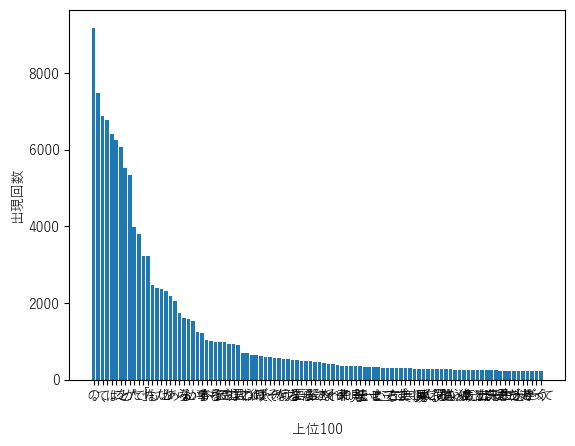

In [20]:
%matplotlib inline
import numpy as np
from collections import Counter
from janome.tokenizer import Tokenizer
import matplotlib.pyplot as plt
# matplotlibのフォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

path = "../data/wagahaiwa_nekodearu.output.txt"

with open(path, encoding="utf-8") as f:
        s = f.read()

t = Tokenizer()

c = Counter(t.tokenize(s, wakati=True))

top = 100  # 出力する上位数
print(c.most_common(top))

values, counts = zip(*c.most_common(top))
plt.bar(values, counts)
plt.xlabel("上位" + str(top) )
plt.ylabel("出現回数")
plt.show()

次は、MeCabを利用します。

    parse = t.parse(s)
    
による形態素解析の結果は、一つの文字列`parse`として格納されています。


それを

    lines = parse.split('\n')

によって、`\n`で分割（`split`）して行ごとに分割します。`lines`は、形態素解析の結果が行ごとに格納されたリストになります。

次に、

    items = (re.split('\t', line) for line in lines)

で、各行をタブ（`\t`）で分割して、`line`を分割した結果を`item[0]`, `item[1]`に格納しています（正確には、内包表記を利用しているため、`item[0]`, `item[1]`という変数は存在しませんが、便宜上、このように説明しています）。
これは、MeCabの出力の各行は、

    主人公	名詞,一般,*,*,*,*,主人公,シュジンコウ,シュジンコー

のように、最初の項目である表層形とその他の情報はタブで区切られているためです。つまり、`item[0]`が`主人公`になり、`item[1]`が`名詞,一般,*,*,*,*,主人公,シュジンコウ,シュジンコー`となります。

最後に、
    
    words = [item[0] for item in items if (item[0] not in ('EOS', '', 't', 'ー'))]
    
で、`item[0]`のみを取り出して、`words`のリストを得ています。つまり、表層形のみを取り出します。
このとき、MeCabでは、文の終わりの`EOS`等の記号を`item[0]`に出力することがありますが、

    if (item[0] not in ('EOS', '', 't', 'ー'))
    
によって除外しています。

このプログラムは、Janomeの場合とほぼ同様の処理ですが、Janomeより高速であることがわかります。確認してください。

---

    %matplotlib inline
    import numpy as np
    from collections import Counter
    import re
    import MeCab
    import matplotlib.pyplot as plt
    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    path = "plain.txt"

    with open(path, encoding="utf-8") as f:
            s = f.read()

    t = MeCab.Tagger()
    parse = t.parse(s)
    lines = parse.split('\n') # 行ごとに分割
    items = (re.split('\t', line) for line in lines) # 各行をTab（\t）で分割して、item[0], item[1]に格納

    # 単語をリストに格納
    words = [item[0] for item in items if (item[0] not in ('EOS', '', 't', 'ー'))]

    c = Counter(words)
    top = 100  # 出力する上位数
    print(c.most_common(top))

    values, counts = zip(*c.most_common(top))
    plt.bar(values, counts)
    plt.xlabel("上位" + str(top) )
    plt.ylabel("出現回数")
    plt.show()


[('の', 9194), ('。', 7487), ('て', 6873), ('、', 6774), ('は', 6425), ('に', 6267), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3987), ('で', 3806), ('「', 3239), ('」', 3239), ('も', 2474), ('ない', 2391), ('だ', 2367), ('し', 2326), ('から', 2043), ('ある', 1732), ('な', 1611), ('ん', 1568), ('か', 1530), ('いる', 1251), ('事', 1207), ('へ', 1034), ('する', 998), ('う', 992), ('もの', 981), ('君', 973), ('です', 973), ('云う', 937), ('主人', 932), ('よう', 696), ('ね', 682), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 555), ('そう', 554), ('何', 539), ('なる', 529), ('さ', 512), ('よ', 509), ('なら', 483), ('吾輩', 482), ('い', 476), ('ます', 458), ('じゃ', 448), ('…', 433), ('これ', 414), ('なっ', 404), ('それ', 388), ('来', 364), ('れ', 356), ('見', 350), ('でも', 348), ('時', 344), ('迷亭', 343), ('――', 333), ('ませ', 330), ('いい', 320), ('ところ', 315), ('三', 314), ('まで', 313), ('方', 312), ('二', 302), ('ず', 299), ('上', 294), ('まし', 289), ('寒月', 286), ('顔', 282), ('ぬ', 277), ('先生', 274), ('見る', 273), ('人間', 272), ('だろ', 270), ('く

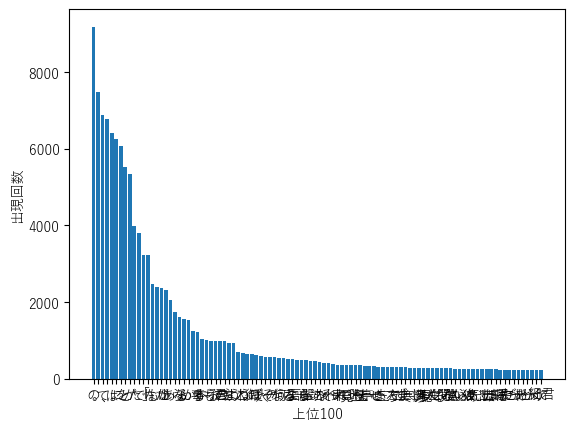

In [21]:
%matplotlib inline
import numpy as np
from collections import Counter
import re
import MeCab
import matplotlib.pyplot as plt
# matplotlibのフォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

path = "../data/wagahaiwa_nekodearu.output.txt"

with open(path, encoding="utf-8") as f:
        s = f.read()

t = MeCab.Tagger()
parse = t.parse(s)
lines = parse.split('\n') # 行ごとに分割
items = (re.split('\t', line) for line in lines) # 各行をTab（\t）で分割して、item[0], item[1]に格納

# 単語をリストに格納
words = [item[0] for item in items if (item[0] not in ('EOS', '', 't', 'ー'))]

c = Counter(words)
top = 100  # 出力する上位数
print(c.most_common(top))

values, counts = zip(*c.most_common(top))
plt.bar(values, counts)
plt.xlabel("上位" + str(top) )
plt.ylabel("出現回数")
plt.show()

## 文単位の単語数

前回、Janomeの場合を説明した、文ごとに構成する単語数のヒストグラムをプロットするプログラムをMeCabをつかって実装すると次のようになります。

ここで定義した関数 `mecab_tokenize(text)`は、`text`を入力として、MeCabの形態素解析結果の単語（表層形）のリストを返すものになっています。今後も便利に使えると思いますので、覚えておいてください。

---
 
    %matplotlib inline
    import re
    import matplotlib.pyplot as plt
    import numpy as np
    import MeCab
    # matplotlibのフォントの設定
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

    # 関数の定義
    t= MeCab.Tagger()
    def mecab_tokenize(text):
            n = t.parseToNode(text)
            tokens = []
            while n:
                    if not n.feature.startswith("BOS/EOS,"):
                            tokens.append(n.surface)
                    n = n.next

            return tokens

    def word_count(l):
            w = [token for token in mecab_tokenize(l)]
            #print(w)

            return len(w)    

    # ここからメイン
    if __name__ == '__main__':
            path = "plain.txt"

            with open(path, encoding="utf-8") as f:
                    s = f.read()

            lines = s.splitlines()

            cnt = np.array([word_count(x) for x in lines])

            # ヒストグラムの生成
            # bins, 表示する棒の数（ビン数）defulat:10
            plt.hist(cnt, bins=cnt.max())
            plt.xlabel("単語数（文単位）")
            plt.ylabel("出現頻度")
            plt.show()

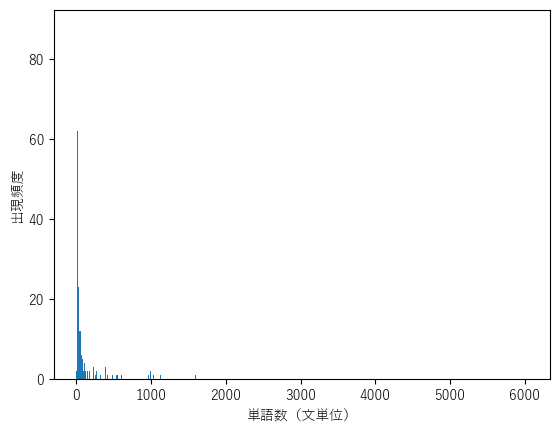

In [22]:
%matplotlib inline
import re
import matplotlib.pyplot as plt
import numpy as np
import MeCab
# matplotlibのフォントの設定
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# 関数の定義
t= MeCab.Tagger()
def mecab_tokenize(text):
        n = t.parseToNode(text)
        tokens = []
        while n:
                if not n.feature.startswith("BOS/EOS,"):
                        tokens.append(n.surface)
                n = n.next

        return tokens

def word_count(l):
        w = [token for token in mecab_tokenize(l)]
        #print(w)

        return len(w)

# ここからメイン
if __name__ == '__main__':
        path = "plain.txt"

        with open(path, encoding="utf-8") as f:
                s = f.read()

        lines = s.splitlines()

        cnt = np.array([word_count(x) for x in lines])

        # ヒストグラムの生成
        # bins, 表示する棒の数（ビン数）defulat:10
        plt.hist(cnt, bins=cnt.max())
        plt.xlabel("単語数（文単位）")
        plt.ylabel("出現頻度")
        plt.show()

# テキストの準備（ダウンロード）

ここからは、今後の授業に使う（複数の）テキストファイルを準備をします。

今回は、著作権の切れた小説が公開されている「青空文庫( https://www.aozora.gr.jp/ )」を利用します。多くの作品があります。皆さんの好きな作品を選んでください。
例えば、（これまでも使ってきた）夏目漱石の「吾輩は猫である」は、 https://www.aozora.gr.jp/cards/000148/card789.html からダウンロードすることができます。

「テキストファイル(ルビあり)」のzipファイルをダウンロードするようにしてください。上記の例では、`789_ruby_5639.zip`をダウンロードした後、zipファイルを展開して、中にある`wagahaiwa_nekodearu.txt`を使用します。これが、今回使用するテキストファイル（テキストデータ）になります。ファイルを確認できたら`wagahaiwa_nekodearu.txt`をJupyter NotebookのHome Pageからアップロード（upload）してください（ただし、「吾輩は猫である」はすでに存在しているはずです）。

あとから複数のテキストデータを使った実習を行いますので、いまのうちに、ファイルをたくさんダウンロードしておきましょう。

「青空文庫」では、さまざまな作家の作品が公開されていますが、その中から、二人以上の作家の作品をダウンロードしてください。
トップの「公開中　作家別：」から作者を選ぶとよいでしょう。 私は、「夏目漱石」と「江戸川乱歩」を選ぶことにしました。

「夏目漱石」は、明治末期から大正初期にかけて活躍した近代日本文学で最も著名な作家の一人です。代表作には『吾輩は猫である』『坊っちゃん』『三四郎』『それから』『こゝろ』『明暗』などがあります。 一方、「江戸川乱歩」は、大正から昭和期にかけて、推理小説を中心として活躍した小説家・推理作家です。江戸川乱歩の作品に登場する探偵の『明智小五郎』や『少年探偵団』は有名です。「夏目漱石」とは異なるジャンルの作品が多い「江戸川乱歩」を選んでみました。 また、「江戸川乱歩」の作品には、少年雑誌に掲載された作品が多くあります。

「夏目漱石」も「江戸川乱歩」のどちらも、作品のシリーズ、連載等の話の繋がりをあまり考えずに、作品のリストから適当に10作品を選択しました。 ただし、作品を選ぶ際は、ある程度、テキストの量を確保したいため、比較的、文章が長い（テキストのサイズが大きい） 作品を選択するようにしてください。 目安としては、各作品のページの「ファイルのダウンロード」には、zip形式のファイルで「サイズ」が５桁以上のサイズになっているものを選ぶようにしてください。

各作品には、「新字新仮名」 と「旧字旧仮名」のものがありますが、今回は、「新字新仮名」を選択してください。 各作品のページの「ファイルのダウンロード」から「テキストファイル(ルビあり)」のzip形式ファイルをダウンロードします。 さきほどと同様に、ダウンロードしたzipファイルを展開すると、中にテキストファイル（.txt）が入っていますので、 そのファイルをサーバにアップロードしてください。

ここで追加の作業をしてください。 各ファイルの作者がわからなくなるので、ファイル名にラベルをつけるようにします。 例えば、私の場合は、「夏目漱石」を01、「江戸川乱歩」を02というように決めました。 作者が増えたときは、03, 04, ...のように番号を増やすとよいでしょう。 ファイル名を変更して、例えば、「夏目漱石」の`wagahaiwa_nekodearu.txt`は、`01_wagahaiwa_nekodearu.txt`と頭に01_をつけたファイル名にしました。 「江戸川乱歩」の`kaijin_nijumenso.txt`は、`02_kaijin_nijumenso.txt`のように、02_を加えます。 

なお、ファイル名には、漢字や平仮名などのいわゆる全角文字は入れないようにして、すべて半角英数字で記述するようにしてください。時々、アルファベットや数字をいわゆる全角英数字で記述する人がいますが、必ず半角英数字にしてください。

結果として、私が保存したファイルのファイル名は以下のようになりました。

    01_bocchan.txt
    01_eijitsu_shohin.txt
    01_higansugimade.txt
    01_london.txt
    01_mon.txt
    01_nowaki.txt
    01_omoidasu_kotonado.txt
    01_sanshiro.txt
    01_wagahaiwa_nekodearu.txt
    01_watashino_kojinshugi.txt
    02_ichimaino_kippu.txt
    02_kaijin_nijumenso.txt
    02_kaijinto_shonen_tantei.txt
    02_kaiki_yonju_menso.txt
    02_kamenno_kyofuo.txt
    02_kyuketsuki.txt
    02_sakasuno_kaijin.txt
    02_tantei_shosetsuno_nazo.txt
    02_tetsujin_kyu.txt
    02_yoseijin_r.txt
    
なお、「青空文庫」からダウンロードしたテキストデータは、文字コードがShift-JISになっていることに注意してください。

# テキストの整形（前処理）

ダウンロードした「青空文庫」のデータをすべてプレーンテキストに変換してみましょう。

まずは、プレーンテキストを保存するフォルダ（ディレクトリ）を作ります。名前は`plain/`にしてください。

フォルダは、Jupyter Notebookのウェブインタフェースから作成してもよいですし、セルから`!mkdir plain`のコマンドを実行することで作成することもできます。

次に、以下のプログラムを実行してください。
このプログラムは、`01_`ではじまり、`.txt`で終わるファイルを一括処理します。`02_`ではじまるファイルもプログラムを修正して同様に処理してください。

---
    import re
    import glob
    import os

    pattern = re.compile(r"《[^《》]*》|［[^［］]*］|｜")
    pattern2 = re.compile( r"〔[^〔〕]*〕")

    files = glob.glob("./01_*.txt")

    for input_file in files:    
        print("input:" +input_file)
        with open(input_file, encoding="shift_jis") as f:
            lines = f.readlines()

        # 初期化
        f_skip = False
        texts = []

        for l in lines:
                l_strip = l.strip()
                # 「底本：」ではじまる行があったら打ち切り
                if re.match(r'^底本：', l_strip):
                    break

                # 行頭から - のみの行があったとき
                # - のみの行から- のみの行までは無視
                if re.match(r'^-+$', l_strip):
                    if f_skip == False:
                        f_skip = True
                    else:
                        f_skip = False
                else:
                    if f_skip == False:
                        result = pattern.sub("",  l_strip)
                        texts.append(pattern2.sub("", result))
                        #print(plain_result)

        output = "./plain/" + os.path.basename(input_file)
        print("output: " + output)
        with open(output, 'w', encoding="utf_8") as f:
            f.writelines(texts)
---

このコードでは、`files = glob.glob("./01_*.txt")`でファイルの一覧を取得しています。

`output = "./plain/" + os.path.basename(input)`で出力するファイル名を決めています。`os.path.basename(input)`によって入力ファイルのパスからフォルダ（ディレクトリ）部分（つまり`./`）を削除して、ファイル名のみを取り出しています。

---
    with open(output, 'w', encoding="utf_8") as f:
        f.writelines(texts)
---
で出力用のファイルを`open()`して、`writelines()`で書き出しています。
なお、`texts`は、処理をしたテキストをためこむためのリストです。`texts.append()`によって正規表現で処理したあとのテキストをリストに追加しています。

なお、今回のプログラムでは、`f.writelines(texts)`で各行末に`\n`を付与をしていないのため、出力結果は、すべて一行につながった状態になります。

なお、「青空文庫」のテキストの冒頭部（ヘッダ） には、

    -------------------------------------------------------
    【テキスト中に現れる記号について】

    《》：ルビ
    （例）坊《ぼ》っちゃん

    ｜：ルビの付く文字列の始まりを特定する記号
    （例）夕方｜折戸《おりど》の

    ［＃］：入力者注　主に外字の説明や、傍点の位置の指定
    （例）おくれんかな［＃「おくれんかな」に傍点］
    -------------------------------------------------------
のような説明が記述されています。これも削除しないといけません。`-`ではじまって、`-`で終わる`-`のみの行があったとき（`if re.match(r'^-+$', l_strip):`）、`f_skip`という変数を`True`に設定し、 そのあとの処理をスキップするようにしています。

また、下端部（フッタ）には、

    底本：「ちくま日本文学全集　夏目漱石」筑摩書房
          1992（平成4）年1月20日第1刷発行
    （省略）
    青空文庫作成ファイル：
    このファイルは、インターネットの図書館、青空文庫（http://www.aozora.gr.jp/）で作られました。入力、校正、制作にあたったのは、ボランティアの皆さんです。

のような説明が記述されています。これは、
    
    if re.match(r'^底本：', l_strip):
        break

のように、正規表現を使って行頭（`^`）から「底本：」ではじまる行があったら、`for`ループを打ち切るようにしています。
正規表現のパターンの`^`は、文字列の先頭という意味です。
「青空文庫」のテキストデータは、本文のあとに、翻訳・校訂などのもとにした本を示した「底本：」が記載されているため、その前までで本文が終わりと判断しています。


In [32]:
import re
import glob
import os

pattern = re.compile(r"《[^《》]*》|［[^［］]*］|｜")
pattern2 = re.compile( r"〔[^〔〕]*〕")

files = glob.glob("./plain/01_*.txt")

for input_file in files:
    print("input:" +input_file)
    with open(input_file, encoding="shift_jis") as f:
        lines = f.readlines()

    # 初期化
    f_skip = False
    texts = []

    for l in lines:
            l_strip = l.strip()
            # 「底本：」ではじまる行があったら打ち切り
            if re.match(r'^底本：', l_strip):
                break

            # 行頭から - のみの行があったとき
            # - のみの行から- のみの行までは無視
            if re.match(r'^-+$', l_strip):
                if f_skip == False:
                    f_skip = True
                else:
                    f_skip = False
            else:
                if f_skip == False:
                    result = pattern.sub("",  l_strip)
                    texts.append(pattern2.sub("", result))
                    #print(plain_result)

    output = "./plain/" + os.path.basename(input_file)
    print("output: " + output)
    with open(output, 'w', encoding="utf_8") as f:
        f.writelines(texts)

input:./plain\01_akai_heya.txt
output: ./plain/01_akai_heya.txt
input:./plain\01_akai_kabutomushi.txt
output: ./plain/01_akai_kabutomushi.txt
input:./plain\01_akumano_monsho.txt
output: ./plain/01_akumano_monsho.txt
input:./plain\01_akuryo.txt
output: ./plain/01_akuryo.txt
input:./plain\01_akuryo_monogatari.txt
output: ./plain/01_akuryo_monogatari.txt
input:./plain\01_ankokusei.txt
output: ./plain/01_ankokusei.txt
input:./plain\01_ichimaino_kippu.txt
output: ./plain/01_ichimaino_kippu.txt
input:./plain\01_idai_naru_yume.txt
output: ./plain/01_idai_naru_yume.txt
input:./plain\01_inju.txt
output: ./plain/01_inju.txt
input:./plain\01_issunboshi.txt
output: ./plain/01_issunboshi.txt


In [35]:
import re
import glob
import os

pattern = re.compile(r"《[^《》]*》|［[^［］]*］|｜")
pattern2 = re.compile( r"〔[^〔〕]*〕")

files = glob.glob("./plain/02_*.txt")

for input_file in files:
    print("input:" +input_file)
    with open(input_file, encoding="shift_jis") as f:
        lines = f.readlines()

    # 初期化
    f_skip = False
    texts = []

    for l in lines:
            l_strip = l.strip()
            # 「底本：」ではじまる行があったら打ち切り
            if re.match(r'^底本：', l_strip):
                break

            # 行頭から - のみの行があったとき
            # - のみの行から- のみの行までは無視
            if re.match(r'^-+$', l_strip):
                if f_skip == False:
                    f_skip = True
                else:
                    f_skip = False
            else:
                if f_skip == False:
                    result = pattern.sub("",  l_strip)
                    texts.append(pattern2.sub("", result))
                    #print(plain_result)

    output = "./plain/" + os.path.basename(input_file)
    print("output: " + output)
    with open(output, 'w', encoding="utf_8") as f:
        f.writelines(texts)

input:./plain\02_aigowaka.txt
output: ./plain/02_aigowaka.txt
input:./plain\02_gujinshinkono_minzokuka.txt
output: ./plain/02_gujinshinkono_minzokuka.txt
input:./plain\02_ichimura_uzaemon_ron.txt
output: ./plain/02_ichimura_uzaemon_ron.txt
input:./plain\02_kappano_hanashi.txt
output: ./plain/02_kappano_hanashi.txt
input:./plain\02_katsukatsutari_shajono_yujin.txt
output: ./plain/02_katsukatsutari_shajono_yujin.txt
input:./plain\02_oguri_gaiden.txt
output: ./plain/02_oguri_gaiden.txt
input:./plain\02_okinano_hassei.txt
output: ./plain/02_okinano_hassei.txt
input:./plain\02_shintokumaru.txt
output: ./plain/02_shintokumaru.txt
input:./plain\02_utano_enjakusuru_toki.txt
output: ./plain/02_utano_enjakusuru_toki.txt
input:./plain\02_utano_hanashi.txt
output: ./plain/02_utano_hanashi.txt


# クレンジングと外れ値処理

ここまでも見てきたように、テキストを分析する際には、前処理として、分析に不要な部分を削除する必要があります。

一般に、データを分析に適したキレイな形にする作業のことを「クレンジング」と呼びます。
「クレンジング」の目的は、データの中から、重複、誤記、揺れ等を見つけ出し、削除、修正、正規化等することで、データの品質を高めることです。
テキストマイニングにおいて、テキストの整形処理である「クレンジング」と「形態素解析」は、とても大切な前処理であり、その良し悪しは、分析結果に大きな影響を与えることになります。

また、テキストマイニング以外においても、クレンジングは大切であり、データに含まれる欠損値や異常値等は、分析の過程で問題となることが多いため、クレンジングによって分析の前にキレイにすることが一般的です。

外れ値は、他の値から大きく外れた値のことです。
外れ値には、「本当に他とは異なるが正しい値」と「測定ミスや誤入力等により生じた異常な値」があり、後者が異常値です。
異常値は、クレンジングの対象にすることが多いと思います。
ただし、極端に大きい値であるからと言って、それが異常値であるとは限りません。
その大きな値に、なにか意味があることもあります。外れ値だからといって、安直に消してしまってよいわけではないことに注意しましょう。

これはテキストマイニングにおいても同じです。
例えば、文章に含まれるある単語の出現回数が極端に多い場合、それが整形処理のミスによって生じたエラーなら異常値です。
ただし、著者がわざと同じ単語を繰り返すような表現で作文していた場合は、その極端な繰り返し回数は、その文章の特徴であると言えます。
この場合、その単語の出現回数は、外れ値になるかもしれませんが、削除してしまっては、その大切な特徴を消してしまうことになります。
つまり、この場合、消してはいけません。

話を「クレンジング」に戻します。
テキストの「クレンジング」において、整形と並んで大切な処理に、表記揺れを統一するための「テキストの正規化」があります。
ここからは「テキストの正規化」について見ていきましょう。

## テキストの正規化

テキストマイニングをする際、「テキストの正規化」は非常にやっかいな問題です。 例えば、

    ㈱ （株）

などの少し特別な記号の扱いがあります。 コンピュータの中では、この二つは違う文字として扱われます。

    そんな時 そんなとき
    リンゴ りんご 林檎

は、どちらもよく使われます。漢字で表記するか、仮名（平仮名、カタカナ）で書くかは、日本語は統一されていません。
仮名漢字交じり文の場合、送り仮名にもバリエーションがあります。

    取り扱い 取扱い

アルファベットの文字列も
    
    Python Ｐｙｔｈｏｎ

のように、いわゆる半角で書くこともできれば、全角文字で記述することもできます。
他にも、
    
    コンピュータ コンピューター

のように、分野や業界によって「正しい」とされている表記が異なる例もあります。

### neologdnライブラリ
表記のゆれは、多種多様、千差万別ですので、これさえやれば大丈夫といった王道のようなテキストの正規化の方法はありません。
ただし、多くの人が同じような問題に遭遇することになるため、いくつか有用なライブラリが開発され、公開されています。
その中から、複数の正規化処理をまとめた`neologdn`というライブラリがありますので使ってみましょう。

`neologdn`は、追加インストールが必要です。

    !pip install neologdn

でインストールしてください。

サンプルプログラムは以下となります。

---
    import neologdn

    text = """
    おいし〜〜〜〜い
    ウェ~∼∾〜〰～イ
    ((((；ﾟДﾟ))))ｶﾞｸｶﾞｸﾌﾞﾙﾌﾞﾙ
    Ｐｙｔｈｏｎ     完全に 理解した！？
    今日はは、ゲンキ１００ばーーーーーーーーーーーーい☆
    """

    text_norm = neologdn.normalize(text)

    print(text)
    print(text_norm)
---

入力と出力を比較すると、以下のような処理が適用されているのがわかると思います。
- 全角英数字は半角に置換
- 半角カタカナは全角に置換
- チルダ文字は削除
- 1回以上連続する長音記号は1回に置換
- 全角記号・半角記号の統一
- 余分なスペースは削除

さらなる詳細は、`neologdn`のウェブサイト https://github.com/ikegami-yukino/neologdn を参照してください。

In [33]:
import neologdn

text = """
おいし〜〜〜〜い
ウェ~∼∾〜〰～イ
((((；ﾟДﾟ))))ｶﾞｸｶﾞｸﾌﾞﾙﾌﾞﾙ
Ｐｙｔｈｏｎ     完全に 理解した！？
今日はは、ゲンキ１００ばーーーーーーーーーーーーい☆
"""

text_norm = neologdn.normalize(text)

print(text)
print(text_norm)


おいし〜〜〜〜い
ウェ~∼∾〜〰～イ
((((；ﾟДﾟ))))ｶﾞｸｶﾞｸﾌﾞﾙﾌﾞﾙ
Ｐｙｔｈｏｎ     完全に 理解した！？
今日はは、ゲンキ１００ばーーーーーーーーーーーーい☆


おいしい
ウェイ
((((;ﾟДﾟ))))ガクガクブルブル
Python完全に理解した!?
今日はは、ゲンキ100ばーい☆



### Unicode正規化

Unicodeでは、非常に多くの文字が定義されており、例えば、`㈱`のような文字も一つの文字として定義されています。
ただし、`（株）`のように`（`, `株`,`）`の３文字で表記することが多いように思います。
`㈱`も`(株)`も意味としては同じなので、この表記ゆれは統一したいところです。

Unicodeには表記ゆれの正規化に関する仕様が定義されており、Pythonでは標準モジュールの`unicodedata`で利用することができます。
下のサンプルプログラムでは、記号が通常の文字列に変換されていると思います。

なお、この例では、
    
    text_norm =  unicodedata.normalize('NFKC', text)

で`text`を`text_norm`に変換しています。

Unicde正規化のルールにはいくつか定義されていますが、NFKCというルールを使用することをオプションで指定します。
このNFKCは、Normalization Form Compatibility Compositionのことで、見た目は異なるが基本的には同じ意味である文字は同じ文字に統一するようなルールとなっています。

---
    import unicodedata
    from collections import Counter

    text = """
    ㈱和歌山大学産業
    今日の気温は２０℃
    ①, ②, ③, ⑩
    ㌔㍉
    新しいディスプレイを買った
    新しいディスプレイを買った
    """

    text_norm =  unicodedata.normalize('NFKC', text)

    print(text)
    for l in text.splitlines():
        print(Counter(l))

    print(text_norm)
    for l in text_norm.splitlines():
        print(Counter(l))

---

なお、今回の例の中には、

    新しいディスプレイを買った
    新しいディスプレイを買った

があり、まったく同じに見えるかもしれませんが、実は「`デ`」が異なります。
上の「`デ`」は普通の「`デ`」です。 実は、下の「`デ`」は 結合文字列というもので、複数の文字（「`テ`」と「` ゙`」（濁点））を組み合わせて1つの文字「`デ`」になっています。
このため、`Counter()`で文字をカウントすると、上は、「`デ`」が１回ですが、下は、「`テ`」と「` ゙`」がわかれて各１回あります。
結合文字列は特殊なものではなく、MacOSのファイル名などでも利用されています。`unicodedata.normalize()`では、これを一文字の「`デ`」に統一しています（これを合成済み文字と呼びます）。

In [37]:
import unicodedata
from collections import Counter

text = """
㈱和歌山大学産業
今日の気温は２０℃
①, ②, ③, ⑩
㌔㍉
新しいディスプレイを買った
新しいディスプレイを買った
"""

text_norm =  unicodedata.normalize('NFKC', text)

print(text)
for l in text.splitlines():
    print(Counter(l))

print(text_norm)
for l in text_norm.splitlines():
    print(Counter(l))


㈱和歌山大学産業
今日の気温は２０℃
①, ②, ③, ⑩
㌔㍉
新しいディスプレイを買った
新しいディスプレイを買った

Counter()
Counter({'㈱': 1, '和': 1, '歌': 1, '山': 1, '大': 1, '学': 1, '産': 1, '業': 1})
Counter({'今': 1, '日': 1, 'の': 1, '気': 1, '温': 1, 'は': 1, '２': 1, '０': 1, '℃': 1})
Counter({',': 3, ' ': 3, '①': 1, '②': 1, '③': 1, '⑩': 1})
Counter({'㌔': 1, '㍉': 1})
Counter({'新': 1, 'し': 1, 'い': 1, 'デ': 1, 'ィ': 1, 'ス': 1, 'プ': 1, 'レ': 1, 'イ': 1, 'を': 1, '買': 1, 'っ': 1, 'た': 1})
Counter({'新': 1, 'し': 1, 'い': 1, 'テ': 1, '゙': 1, 'ィ': 1, 'ス': 1, 'プ': 1, 'レ': 1, 'イ': 1, 'を': 1, '買': 1, 'っ': 1, 'た': 1})

(株)和歌山大学産業
今日の気温は20°C
1, 2, 3, 10
キロミリ
新しいディスプレイを買った
新しいディスプレイを買った

Counter()
Counter({'(': 1, '株': 1, ')': 1, '和': 1, '歌': 1, '山': 1, '大': 1, '学': 1, '産': 1, '業': 1})
Counter({'今': 1, '日': 1, 'の': 1, '気': 1, '温': 1, 'は': 1, '2': 1, '0': 1, '°': 1, 'C': 1})
Counter({',': 3, ' ': 3, '1': 2, '2': 1, '3': 1, '0': 1})
Counter({'キ': 1, 'ロ': 1, 'ミ': 1, 'リ': 1})
Counter({'新': 1, 'し': 1, 'い': 1, 'デ': 1, 'ィ': 1, 'ス': 1, 'プ': 1, 'レ': 1, 'イ': 1, 'を': 1, '買

# 本日の課題
## 課題1

授業中に説明した手順に従い、「青空文庫」から作者２名以上、各作者１０作品以上（つまり、合計で２０作品以上）のテキストを取得して、`plain/`の下にプレーンテキストに変換した各ファイルを保存しなさい。

作者は、作者ごとに`01_`, `02_`, `03_`のような数値によるラベルをファイル名の頭につけるようにするすること。
詳細は、授業で説明した通りである。ファイル数を増やして、作者２名以上、各作者１０作品以上（つまり、合計で２０作品以上）のデータを準備することが課題である。

なお、今回用意するファイルは、今後の課題でも使用するため、慎重に作業を行うようにしてください。

以下のセルには、変換プログラムが`print()`した出力結果を入力して提出してください（セルの中には記載例を入力してあるので、削除してから各自の結果を入力してください）。

## 課題2

`plain/`の中のすべてのテキストファイルを整形・正規化して、その結果を新しく作った出力用フォルダ`clean/`に保存するプログラムを完成させない。

この課題を実行する前に、まず、出力用のフォルダ（ディレクトリ）である`clean/`を作成してください。

---

    !mkdir clean

---

次に、以下のプログラムを完成させて`plain/`の中にあるすべての`*.txt`のファイルを処理し、`clean/`の中に出力するようにしてください。

なお、整形・正規化処理として、以下の処理は必ず適用するようにしてください。

- ja_sentence_segmenterによる行の分割
- neologdnライブラリを使ったテキスト整形
- Unicode正規化

それ以外のテキスト整形の処理を含めても構いません。

In [38]:
import glob
import os
import neologdn
import unicodedata
import functools

from ja_sentence_segmenter.common.pipeline import make_pipeline
from ja_sentence_segmenter.concatenate.simple_concatenator import concatenate_matching
from ja_sentence_segmenter.normalize.neologd_normalizer import normalize
from ja_sentence_segmenter.split.simple_splitter import split_newline, split_punctuation

files = glob.glob("./plain/*.txt") # 入力ファイルのリストを取得

for input_file in files:    
    print("input:" +input_file)

    # この部分にコードを追加する
    neolog_output = neologdn.normalize(input_file)
    output =  unicodedata.normalize('NFKC', neolog_output)
    # outputは ./clean/ の下に保存するようにする
    print("output: " + output)
    with open(output, 'w', encoding="utf_8") as f:
        f.writelines('\n'.join(lines))

input:./plain\01_akai_heya.txt
output: ./plain\01_akai_heya.txt
input:./plain\01_akai_kabutomushi.txt
output: ./plain\01_akai_kabutomushi.txt
input:./plain\01_akumano_monsho.txt
output: ./plain\01_akumano_monsho.txt
input:./plain\01_akuryo.txt
output: ./plain\01_akuryo.txt
input:./plain\01_akuryo_monogatari.txt
output: ./plain\01_akuryo_monogatari.txt
input:./plain\01_ankokusei.txt
output: ./plain\01_ankokusei.txt
input:./plain\01_ichimaino_kippu.txt
output: ./plain\01_ichimaino_kippu.txt
input:./plain\01_idai_naru_yume.txt
output: ./plain\01_idai_naru_yume.txt
input:./plain\01_inju.txt
output: ./plain\01_inju.txt
input:./plain\01_issunboshi.txt
output: ./plain\01_issunboshi.txt
input:./plain\02_aigowaka.txt
output: ./plain\02_aigowaka.txt
input:./plain\02_gujinshinkono_minzokuka.txt
output: ./plain\02_gujinshinkono_minzokuka.txt
input:./plain\02_ichimura_uzaemon_ron.txt
output: ./plain\02_ichimura_uzaemon_ron.txt
input:./plain\02_kappano_hanashi.txt
output: ./plain\02_kappano_hanashi.

### 提出方法
上記のコードを参考にして、セルに課題の回答となる外部コマンドとコードを入力して実行してください。
実行できたら、Notebook形式ファイル（.ipynb）を保存（File -> Download as）して、保存した.ipynbのファイルをMoodleコースから提出してください（次回課題の解説をしますから、あきらめずに提出してください）。